In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

fn = '../results/2023-08-13_clust/pdx_expt/analysis/results.csv'
df = pd.read_csv(fn)
df.head()

,seed,transfer,raw,dataset
0,0,0.430270,-0.142419,pdo_to_pdx
1,1,-0.367012,-0.315172,pdo_to_pdx
2,2,0.485366,0.225376,pdo_to_pdx
3,3,0.663106,-0.072543,pdo_to_pdx
4,4,0.484015,0.074112,pdo_to_pdx


In [12]:
dataset_names = ["pdo_to_pdx"]
method_names = ["raw", "transfer"]

## Get those p-values!
for dataset in dataset_names:
    sub_df = df[(df["dataset"]==dataset)]
    print(dataset, "p-value=", mannwhitneyu(sub_df['raw'], sub_df['transfer']).pvalue)

pdo_to_pdx p-value= 0.014019277113959953


In [3]:
# TODO: Understand mannwhitneyu test, and what's being returned here

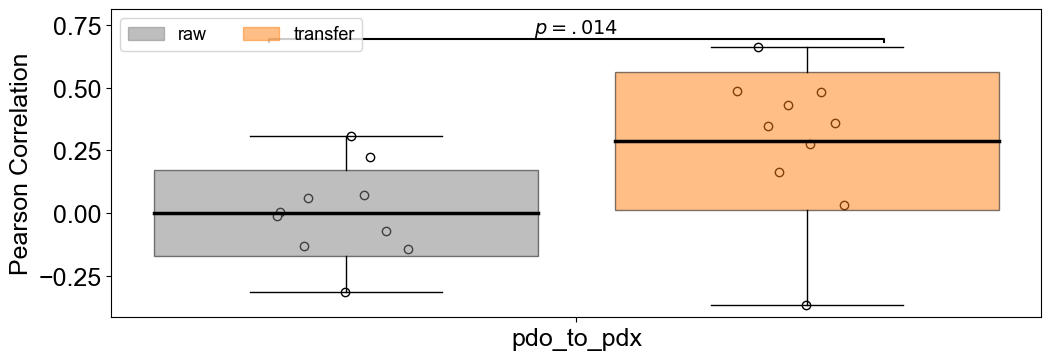

In [13]:
plt.rcParams.update({"font.size":18}) ## Set fontsize

## Make the box plots
comp_colors = ['tab:gray', 'tab:orange']
fig, ax = plt.subplots(figsize=(12,4))
stats = []
positions = []
curr_pos = 0
for dataset in dataset_names:
    for method in method_names:
        v = df[(df["dataset"]==dataset)][method]
        mu = np.mean(v)
        stdv = np.std(v)
        stats.append({"med":mu,           ## This is the line drawn in the box plot
                      "q1":mu-stdv,       ## This is the lower extent of the box plot
                      "q3":mu+stdv,       ## This is the upper extent of the box plot
                      "whislo":np.min(v), ## This is the lower extent of the whiskers
                      "whishi":np.max(v)})## This is the upper extent of the whiskers
    
        ax.scatter(x=(curr_pos + np.random.uniform(-1, 1, size=len(v))), ## Randomly scatter the points horizontally
                   y=v, 
                   color='white', 
                   edgecolors="black", 
                   zorder=-1)  ## zorder=-1 places the points behind the boxes 
    
        positions.append(curr_pos)
        curr_pos += 6
    curr_pos += 5

## Actual code to plot
bplot = ax.bxp(stats, 
               positions=positions, 
               widths=5, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=2.5, color='black'), 
               patch_artist=True, 
               zorder=0)

## Go through the boxes and set color + transparency
for i, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(comp_colors[i%len(method_names)])
    patch.set_alpha(0.5)

xtickpos = [ 0.5*(positions[0]+positions[1])]
plt.xticks(xtickpos, dataset_names)
plt.ylabel("Pearson Correlation")
plt.ylim(np.min(df['raw'])-0.1, np.max(df['transfer'])+0.15)

## Plot those p-values!
h = 0.01
p_values = ["$p=.014$"] 
for i, dataset in enumerate(dataset_names):
    sub_df = df[(df["dataset"]==dataset)]
    y = np.max(sub_df["transfer"])+0.02
    x1, x2 = positions[2*i]-1, positions[2*i + 1]+1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
    plt.text((x1+x2)*.5, y+h, p_values[i], ha='center', va='bottom',color='k', fontsize=14)

patch1 = mpatches.Patch(color=comp_colors[0], alpha=0.5, label='raw')
patch2 = mpatches.Patch(color=comp_colors[1], alpha=0.5, label='transfer')

plt.legend(handles=[patch1, patch2], ncol=2, fontsize=13, loc='upper left')
